<a href="https://colab.research.google.com/github/Taghr66d/MSc-SummerProject2025/blob/main/MLy_Cusp_injection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mly

In [ ]:
from mly.datatools import DataPod, DataSet, generator
import numpy as np
import matplotlib.pyplot as plt


In [10]:
def cusp_signal(amplitude=9.85e-22, f_high=512, delta_t=1/1024, duration=0.1): #fs = 8192 --> 1024
    fs = 1 / delta_t
    N = int(duration * fs)
    freqs = np.fft.fftfreq(N, d=delta_t)
    h_f = np.zeros(N, dtype=complex)
    pos_mask = freqs > 0
    f_pos = freqs[pos_mask]
    spectrum = f_pos**(-4/3)
    spectrum[f_pos >= f_high] *= np.exp(1 - f_pos[f_pos >= f_high] / f_high)
    h_f[pos_mask] = amplitude * spectrum
    h_f = h_f + np.conj(h_f[::-1])
    h_f *= np.exp(-2j * np.pi * freqs * (duration / 2))
    h_t = np.fft.ifft(h_f).real
    t = np.linspace(0, duration, N, endpoint=False)
    return t, h_t

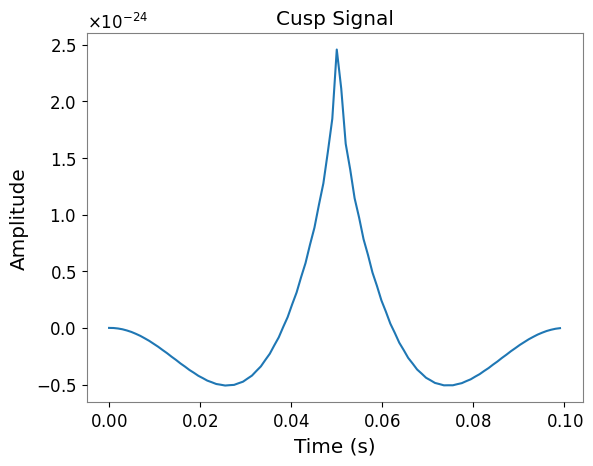

In [11]:
sample_rate = 1024
delta_t = 1 / sample_rate
signal_dur = 0.1
t_sig, signal = cusp_signal(delta_t=delta_t, duration=signal_dur)

plt.plot(t_sig, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Cusp Signal')
plt.grid(False)

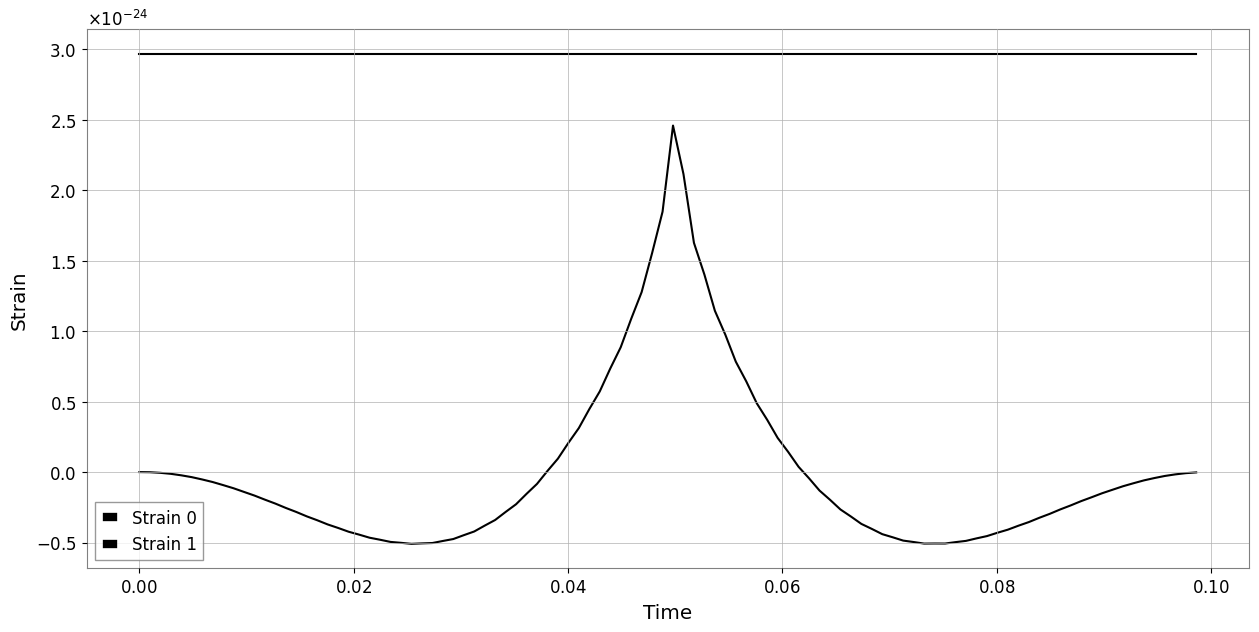

In [12]:

pod=DataPod([signal,np.zeros(len(signal))],fs=1024)
pod.plot()

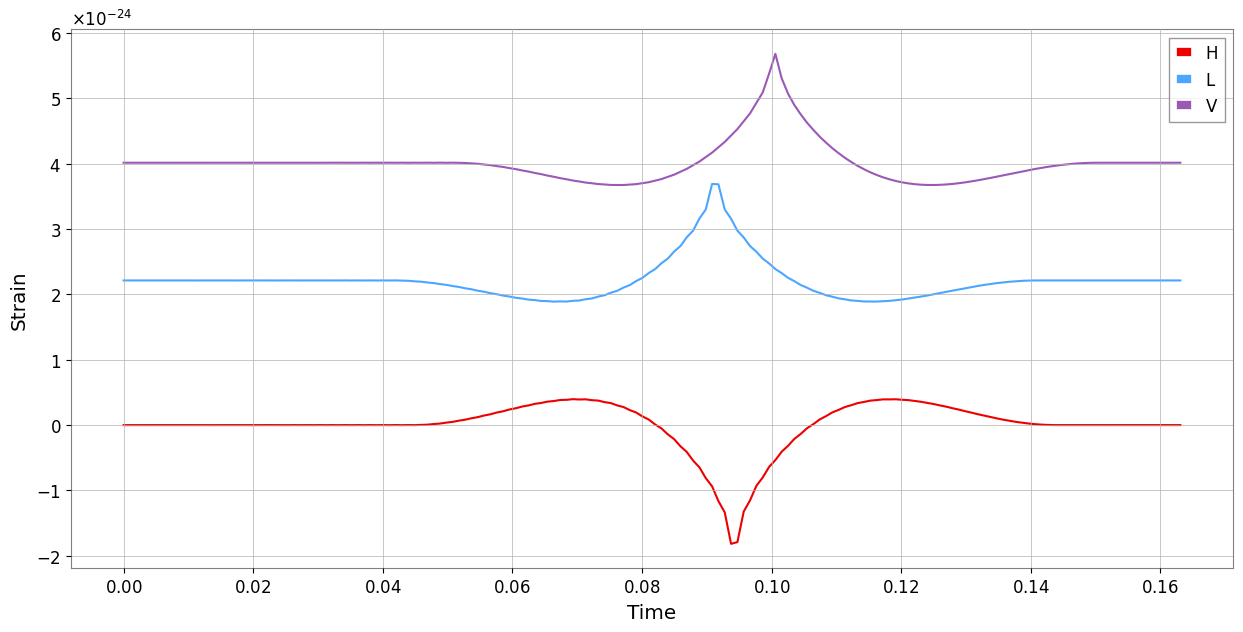

In [32]:
## Project in to 3 detectors
from mly.projectwave import *
w = projectWave(sourceWaveform= pod.strain
                ,detectors ='HLV'
                ,fs=1024
                ,outputFormat='datapod')
w.plot()

profiles {'H': 'aligo', 'L': 'aligo', 'V': 'avirgo', 'K': 'KAGRA_Early', 'I': 'aligo'}




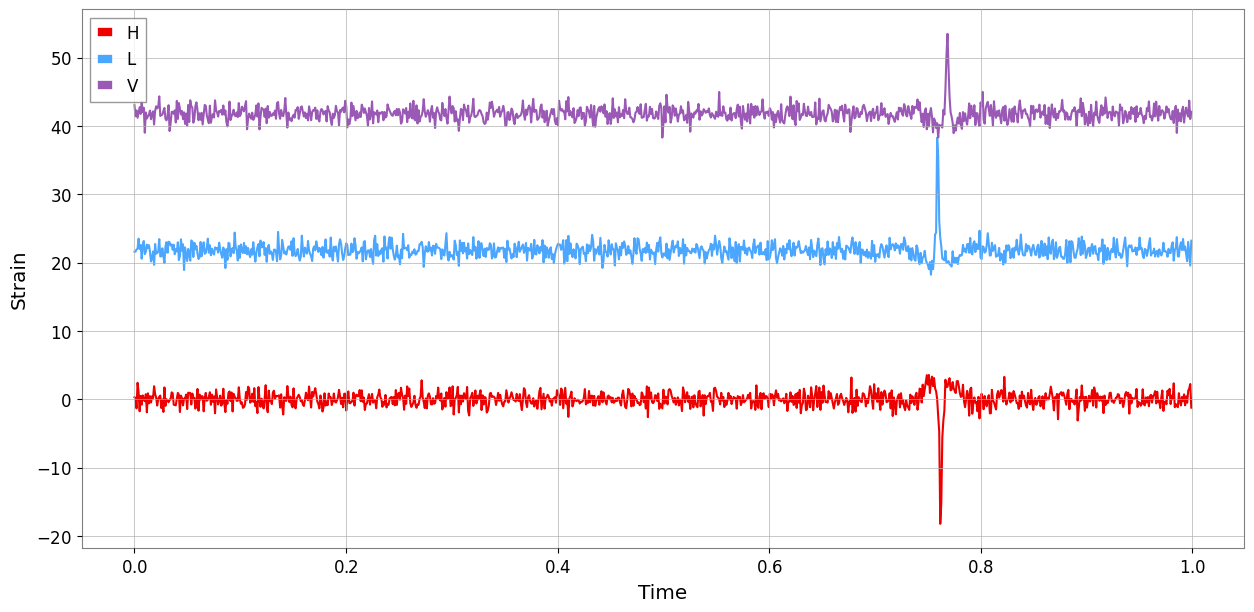

In [33]:
## inject into noise
pod1 = generator(duration =1, fs= 1024, detectors='HLV', size=1,
                 injection_source =w,
                 injectionSNR= 50)[0] #the SNR range expected for the project [20-50]

pod1.plot()